# Analysing the Shampoo Sales Dataset from Machine Learning Mastery

This notebook is used to analyze the 'Shampoo Sales Datase' from the Machine Learning Mastery. The dataset is available [here](https://machinelearningmastery.com/time-series-datasets-for-machine-learning/).

This dataset describes the monthly number of sales of shampoo over a 3 year period.
The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright and Hyndman (1998).

The notebook is dividede as follows:
    
1. Data exploration
2. Data modelling 
3. Conclusion

## 1. Data exploration

In this section, we explore the characteristics of the dataset, including its dimensions and characteristics of its variables.

The dataset contains only two columns and 36 lines.
The first column of the dataset contains strings denoting the month number and the second column cotains integers denoting the number of passengers for that month.

In [1]:
import pandas as pd
import numpy as np
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/leuzinger/opt/anaconda3/lib/python3.8/site-packages (0.24.2)


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv')
df.reset_index(inplace=False)
df.head()

Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [4]:
from datetime import datetime, timedelta
from collections import OrderedDict

df_date = df.copy()

# Sample start and end dates
start = datetime(year=1995, month=1, day=1)
end = datetime(year=1998, month=1, day=1)

# Get list of months >= start and < end

months_ = OrderedDict(((start + timedelta(_)).strftime("%Y-%m-01"), 0) for _ in range((end - start).days))
months_list = list(months_.items())
months=[]
months = [months[0] for months in months_list]

for i in range(36):
    month_str = months[i]
    #date_time_month = datetime.strptime(month_str, '%Y-%m-%d').date()
    #df_date.iloc[i,0] = date_time_month
    df_date.iloc[i,0] = month_str
df_date.rename(columns={'Month':'Date'},inplace=True)
df_date.head()  

Date  Sales
0  1995-01-01  266.0
1  1995-02-01  145.9
2  1995-03-01  183.1
3  1995-04-01  119.3
4  1995-05-01  180.3

In [5]:
print(df_date.dtypes)
print(df_date.columns)

Date      object
Sales    float64
dtype: object
Index(['Date', 'Sales'], dtype='object')


### Data vizualization

"The first thing to do in any data analysis task is to plot the data because they enable many features of the data to be visualised, including patterns, unusual observations, changes over time, and relationships between variables" [(HYNDMAN; ATHANASOPOULOS, 2018)](https://otexts.com/fpp2/).

Therefore, we will start our analysis making some graphics that are useful for understanding timeseries. The obvious graph to start is a time plot.

The time plot shows that there is considerable varation from one month to the next. Besides, there seems to be a clear trend (long-term increase or decrease in the data). The number of sale per month does not seem to be affected by seasonal (fluctuations with a fixed frequency) factors though. And the time series does not seem to be cyclic (fluctuations without a fixed frequency).

Next, we check for seasonal patterns. The seasonal plot and seasonal polar plot confirm that there is no seasonality in the data considering the same months year by year. However, these plots give more indications that there is a trend in the data because the values are consistently increasing from one year to another.

You can also group the data at seasonal intervals and see how the values are distributed within a given year or month using box plots, which make the year-wise and month-wise distributions evident. The boxplots show that the data have a trend, although it does not seem to have any seasonality, as increases and decreases in sales are not following any monthly pattern.

The boxplots make the year-wise and month-wise distributions evident. Also, in a month-wise boxplot, the months of December and January clearly has higher drug sales, which can be attributed to the holiday discounts season.

Besides, we also need to look for autocorrelation in the dataset. From the autocorrelation function (ACF) plot, we see that our data clearly have a trend, as it is presenting a nonsymmetrical sine wave pattern [(HOLMES; SCHEURELL; WARD, 2021)](https://nwfsc-timeseries.github.io/atsa-labs/). This is also confirmed by the partial autocorrelation function (PACF). Therefore, our data probably have a **increasing trend** and is **not stationary**.

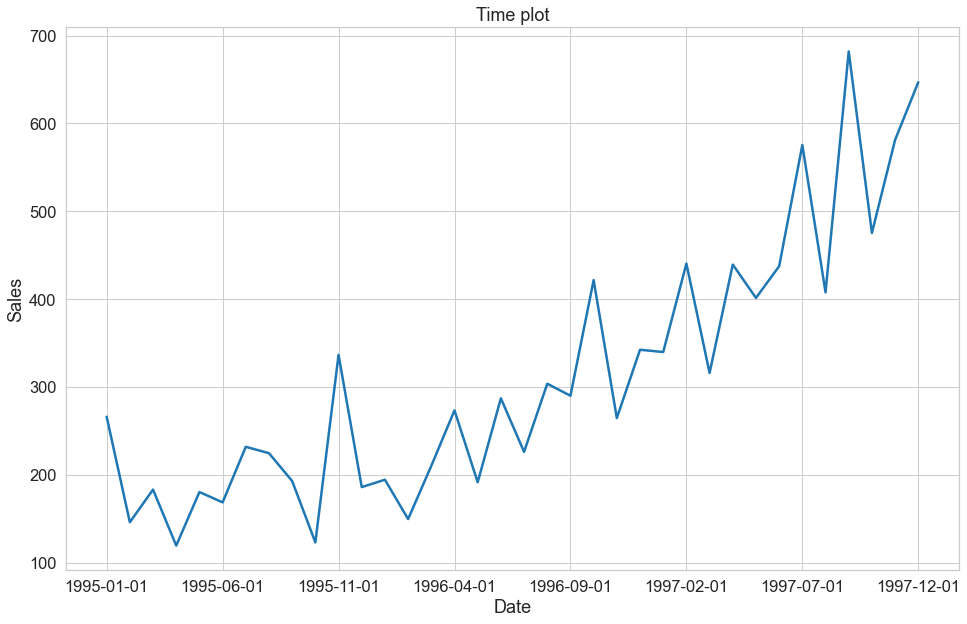

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

time_plot = df_date
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=time_plot,x='Date',y='Sales')
ax.set(xlabel='Date', ylabel = 'Sales')
ax.set_title('Time plot')
ax.set_xticks(np.arange(0, 36 + 1, 5))
plt.show()

In [7]:
df_seasonal = pd.DataFrame(columns=np.arange(1, 12 + 1),index = ['1995','1996','1997'])
for i in range(3):
    for j in range(12):
        n = 12*i+j
        df_seasonal.iloc[i,j] = df.iloc[n,1]
df_seasonal.head()

1      2      3      4      5      6      7      8      9      10  \
1995    266  145.9  183.1  119.3  180.3  168.5  231.8  224.5  192.8  122.9   
1996  194.3  149.5  210.1  273.3  191.4    287    226  303.6  289.9  421.6   
1997  339.7  440.4  315.9  439.3  401.3  437.4  575.5  407.6    682  475.3   

         11     12  
1995  336.5  185.9  
1996  264.5  342.3  
1997  581.3  646.9

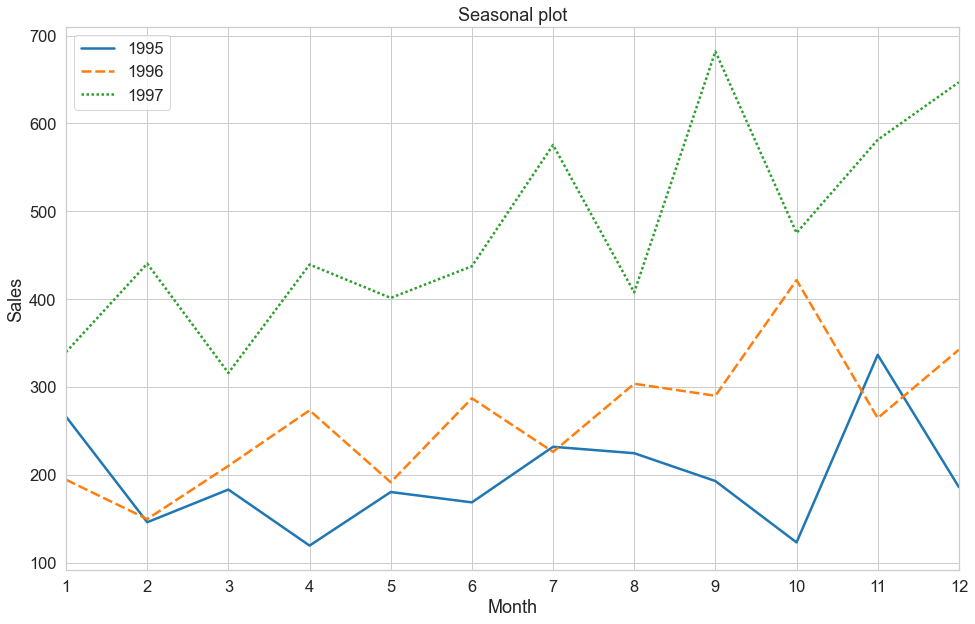

In [8]:
seasonal_plot = df_seasonal.astype(float).copy().transpose()
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=seasonal_plot)
ax.set(xlabel='Month', ylabel = 'Sales')
ax.set_title('Seasonal plot')
ax.set_xlim(1,12)
ax.set_xticks(np.arange(1, 12 + 1, 1))
plt.show()

In [9]:
import plotly.graph_objects as go


categories = list(df_seasonal.columns)
categories = [*categories, categories[0]]
categories = [str(i) for i in categories]

year_1 = list(df_seasonal.iloc[0,:])
year_2 = list(df_seasonal.iloc[1,:])
year_3 = list(df_seasonal.iloc[2,:])

year_1 = [*year_1, year_1[0]]
year_2 = [*year_2, year_2[0]]
year_3 = [*year_3, year_3[0]]
#print(categories)
#print(year_1)

fig = go.Figure(
    data=[
        go.Scatterpolar(r=year_1, theta=categories, name='1995'),
        go.Scatterpolar(r=year_2, theta=categories, name='1996'),
        go.Scatterpolar(r=year_3, theta=categories, name='1997')
    ],
    layout=go.Layout(
       title=go.layout.Title(text='Polar seasonal plot'),
        polar={'radialaxis': {'visible': True},'bgcolor':'PapayaWhip'},
        showlegend=True,
        width=750,
        height=750,
        font=dict(
        size=18,
        )
    )
)

fig.show()

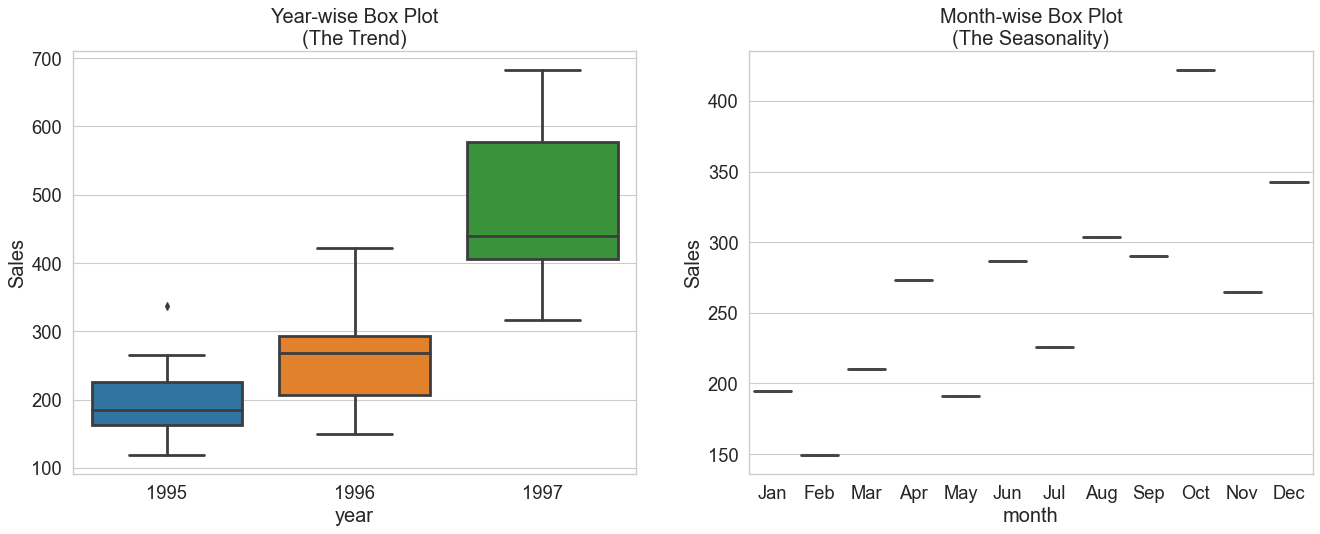

In [20]:
box_plot = df_date.copy()
box_plot['Date'] = pd.to_datetime(box_plot['Date'])
box_plot['year'] = [d.year for d in box_plot.Date]
box_plot['month'] = [d.strftime('%b') for d in box_plot.Date]
years = box_plot['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Sales', data=box_plot, ax=axes[0])
sns.boxplot(x='month', y='Sales', data=box_plot.loc[~box_plot.year.isin([1995, 1997]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

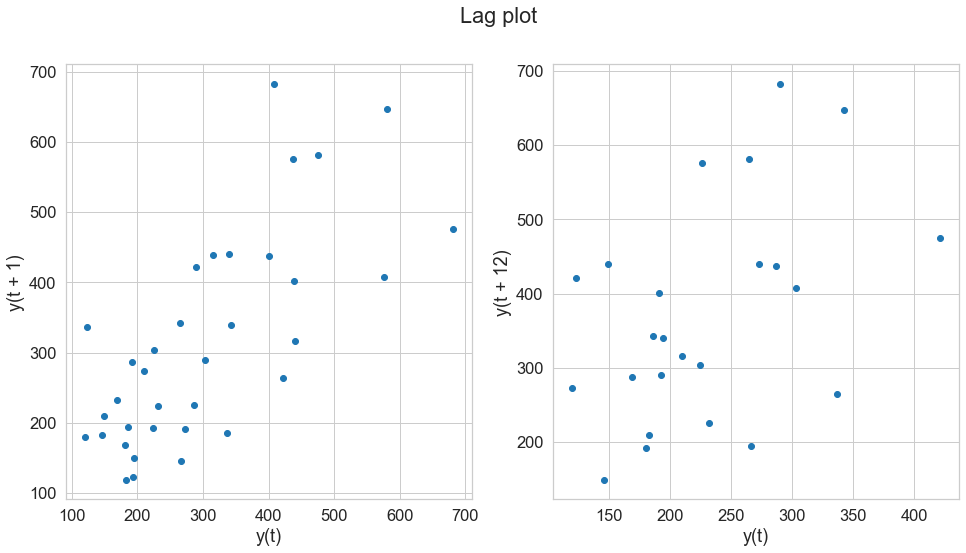

In [21]:
fig_lag = plt.figure(figsize=(16, 8))
#fig, ax = plt.subplots(1, 2, figsize=(12, 7))
#ax[0].set_xlabel('Time')
#ax[0].set_ylabel('Amplitude')
#ax[0].axhline(y=0, color='k')
fig_lag.suptitle('Lag plot')
plt.subplot(121)
pd.plotting.lag_plot(df_date['Sales'], lag= 1)
plt.subplot(122)
pd.plotting.lag_plot(df_date['Sales'], lag= 12)
plt.show()

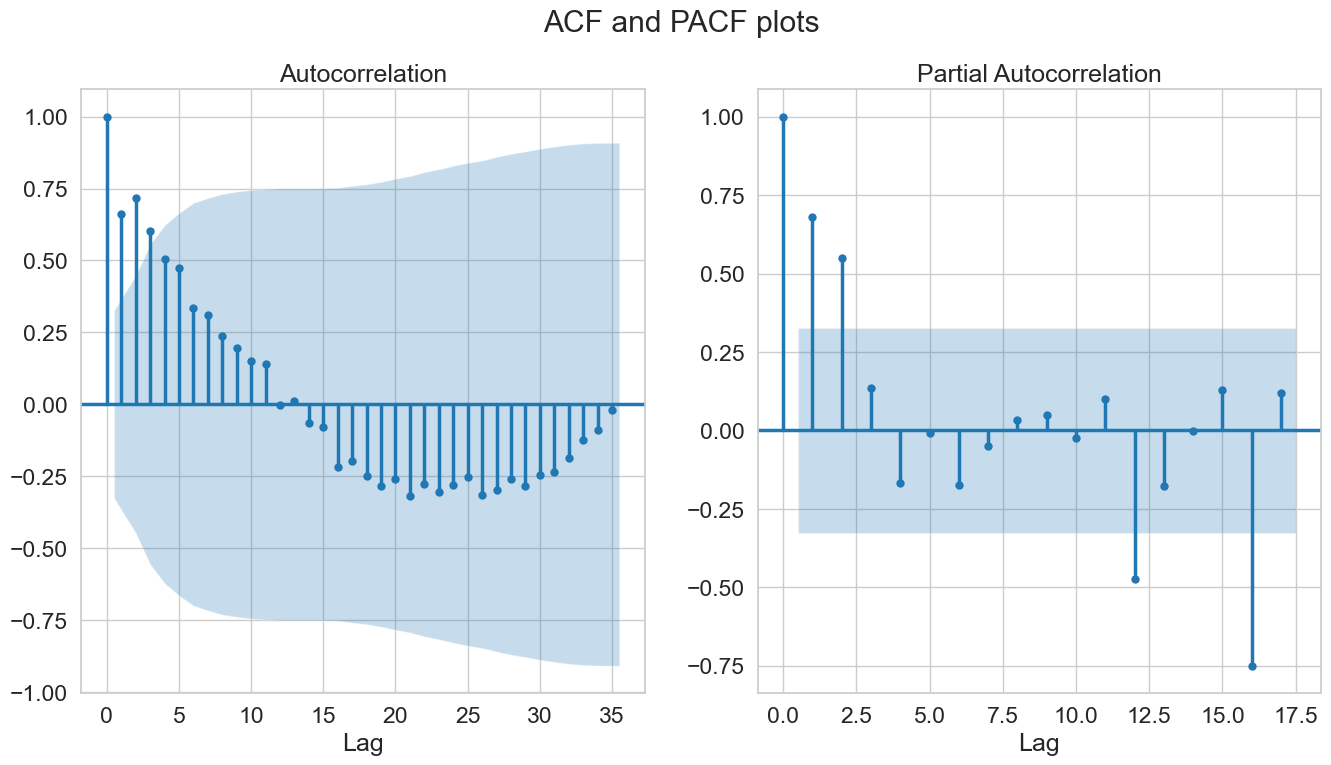

In [22]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig_auto, axes = plt.subplots(1,2,figsize=(16,8), dpi= 100)
fig_auto.suptitle('ACF and PACF plots')
plot_acf(df_date['Sales'], lags=35, ax=axes[0])
axes[0].set_xlabel('Lag')
plot_pacf(df_date['Sales'], lags=17, ax=axes[1])
axes[1].set_xlabel('Lag')
plt.show()

## 2. Data modelling

### Data analysis

The results of the exploratory analysis indicated that the time series is not stationary, i.e., its properties depend on the time at which the series is observed. Before continuing, let's check this using two tests: 

1. Augmented Dickey Fuller test (ADH Test)
2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

In the ADF test, the null hypothesis is that the time series possesses a unit root and is non-stationary. So, if the p-value is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the p-value interpretation is just the opposite of ADH test. So, the time series is stationary if the null hypothesis is valid (p-value > 0.05).

The tests confirm that the data series is **not stationary**. The p-value is 1 for the ADF test, and the **null hyposthesis of non-stationarity cannot be rejected**. Besides, the p-value is 0.01 for the KPSS test, **rejecting the null hypothesis of stationarity**.

Therefore, we need to **extract the trend component** of our data before trying to create a forecasting model. The first step is to decompose the data in its components, S (seasonal component), T (trend-cycle component), and R (remainder component) (HYNDMAN; ATHANASOPOULOS, 2018; HOLMES; SCHEURELL; WARD, 2021). There are many different methods for decomposing data. There are the so called 'classical decomposition methods': the additive and multiplicative methods. Besides, there are more recent methods, such as X11, Seasonal Extraction in ARIMA Time Series (SEATS), and Seasonal and Trend decomposition using Loess (STS). The [statsmodels library](https://www.statsmodels.org/stable/index.html) provides many of these methods. Therfore, we can easily try more than one of them.

Both the classical decomposition methods confirm that the **data have a trend component**. Moreover, **there is also seasonal component** that was not detected in the exploratory analysis. However, these are 'naive' decompositions, thus we should use a more versatile and robust method. 

Thus, we can use the STL method to check our previous results. We use two kinds of STL methods. In the first case, we activate the 'robust' feature, which uses a data-dependent weighting function that re-weights data when estimating the LOESS (and so is using LOWESS). **Using robust estimation allows the model to tolerate larger errors**. In the second case, we do not activate the robust feature. Besides, we use the decomposed components to measure the strenght of trend and seasonality in the time series. In this case, the closer Ft and Fs are to 1, the higher is the strenght.

The results from both methods show that **there is a strong trend component** in the data. However, the robust STL indicate that the seasonal component is not so relevant, while the non-robust STL result indicates the contrary. Given that a clear pattern of seasonality is also seen in the classical methods, we can assume that the **seasonal component is relevant**.

We need to remove the trend and the seasonality to use be able to use the data to make forecasts. 

We will test two methods see which of them return the more stationary time series. 

First, we use differencing, i.e., compute the differences between consecutive observations. "Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality" (HYNDMAN; ATHANASOPOULOS, 2018). **After differencing the time series, the result of the ADF and the KPSS testes show that the resulting time series is stationary**.

Second, we remove the trend using a model fitting. "Linear trends can be summarized by a linear model, and nonlinear trends may be best summarized using a polynomial or other curve-fitting method [...] In addition to being used as a trend identification tool, these fit models can also be used to detrend a time series" (BROWNLEE, 2020). **However, after fitting the the time series, stationatity is confirmed in the KPSS test, but rejeceted in the ADF test**. This is probably due to the seasonal component we identified earlier. Thus, we can try to remove the seasonal component before detrending the series. **We use the seasonal differencing method to do this**. Then we apply the model fitting to the deseazonalized data. **This time, the resulting data passes both tests**.

Nonetheless, **we use the differenced data set in our modelling** because "applying more differences than required will induce false dynamics or autocorrelations that do not really exist in the time series. Therefore, do as few differences as necessary to obtain a stationary series" (HYNDMAN; ATHANASOPOULOS, 2018).

----------


In [23]:
from statsmodels.tsa.stattools import adfuller, kpss
import warnings

# ADF Test
result = adfuller(df_date['Sales'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_date['Sales'], nlags='auto', regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
warnings.filterwarnings("ignore")

ADF Statistic: 3.0601420836411806
p-value: 1.0
Critial Values:
   1%, -3.7238633119999998
Critial Values:
   5%, -2.98648896
Critial Values:
   10%, -2.6328004

KPSS Statistic: 0.752776
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/Users/leuzinger/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




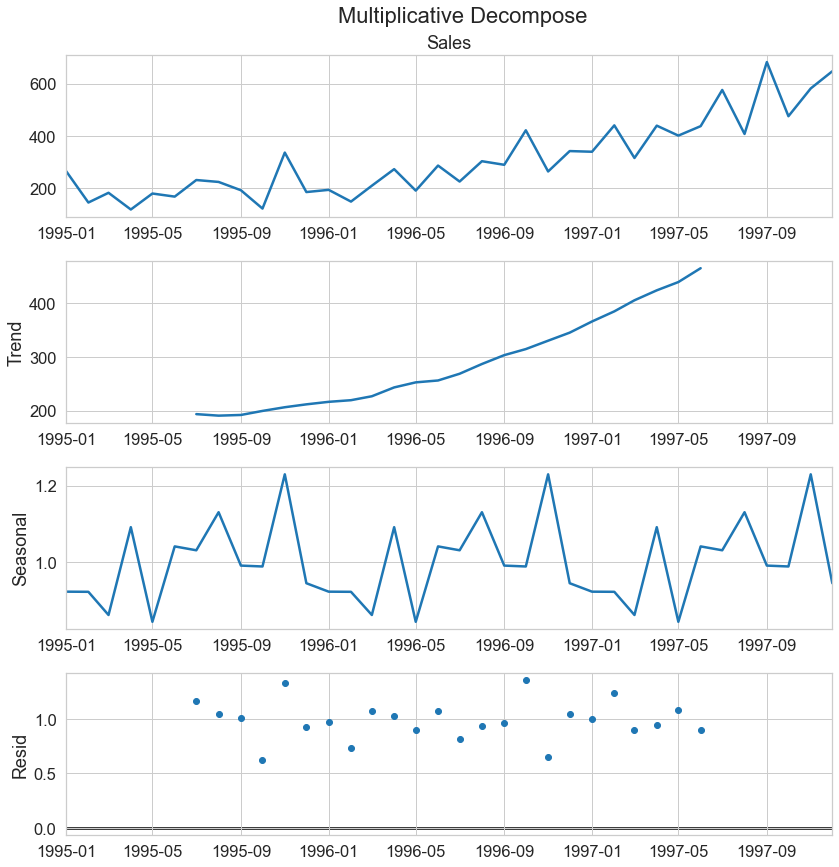

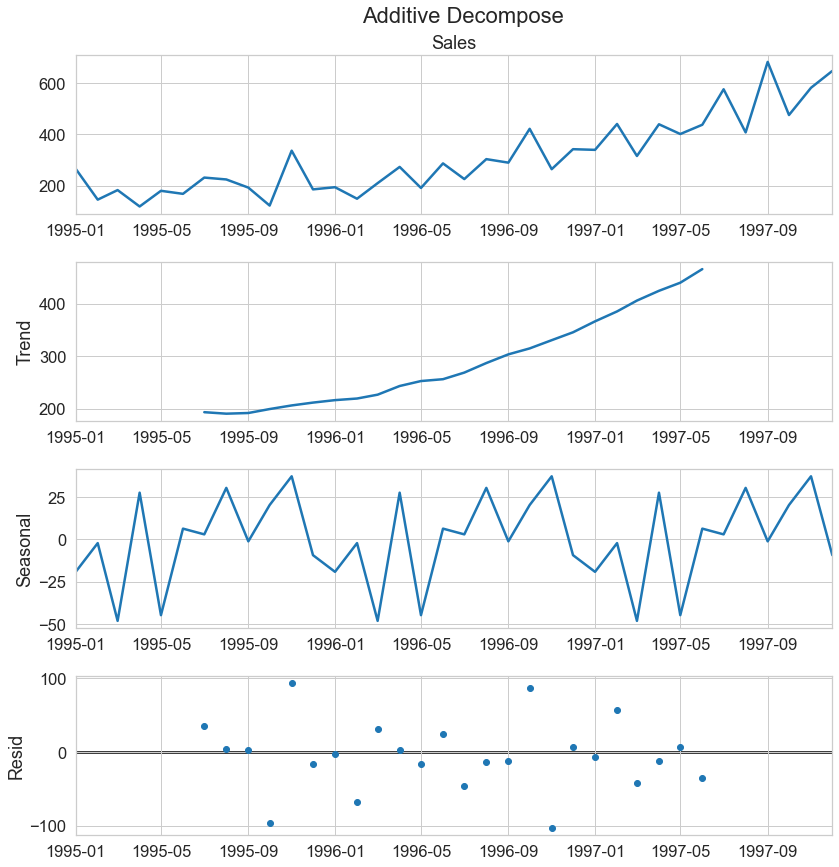

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
#from dateutil.parser import parse

df_decompose = df_date.copy()
df_decompose['Date'] = pd.to_datetime(box_plot['Date'])
df_decompose.set_index('Date',inplace=True)

# Decomposition is  Multiplicative
multiplicative = seasonal_decompose(df_decompose['Sales'], model='multiplicative')

# Decomposition is  Additive
additive = seasonal_decompose(df_decompose['Sales'], model='additive')

# Plotting
plt.rcParams.update({'figure.figsize': (12,12)})
multiplicative.plot().suptitle('Multiplicative Decompose', x=0.55,y=1.01,fontsize=22)
additive.plot().suptitle('Additive Decompose', x=0.55,y=1.01, fontsize=22)
plt.show()

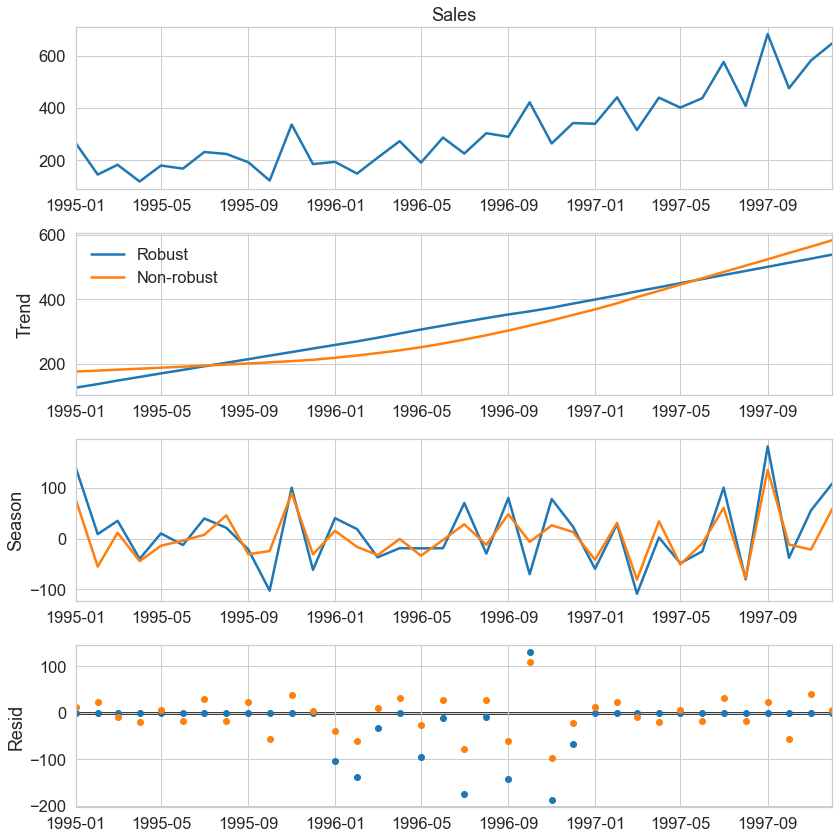

In [25]:
from statsmodels.tsa.seasonal import STL

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ['trend', 'seasonal', 'resid']
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == 'resid':
            ax.plot(series, marker='o', linestyle='none')
        else:
            ax.plot(series)
            if comp == 'trend':
                ax.legend(legend, frameon=False)


stl_R = STL(df_decompose['Sales'],robust=True)
res_R = stl_R.fit()
fig = res_R.plot()
stl_nR = STL(df_decompose['Sales'],robust=False)
res_nR = stl_nR.fit()
add_stl_plot(fig, res_nR, ['Robust','Non-robust'])

In [27]:
from statistics import variance

# Extract the Components
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed_stl = pd.concat([res_R.seasonal, res_R.trend, res_R.resid, res_R.observed], axis=1)
df_reconstructed_stl.columns = ['season', 'trend', 'residual', 'actual_values']
print(df_reconstructed_stl.head())

#calculate the strenght of the trend component
T_R = df_reconstructed_stl['trend']+df_reconstructed_stl['residual']
Ft = max((0,1-variance(df_reconstructed_stl['residual'])/variance(T_R)))
print('\nStrength of the trend component:%0.3f'%Ft)

#calculate the strenght of the seasonal component
S_R = df_reconstructed_stl['season']+df_reconstructed_stl['residual']
Fs = max((0,1-variance(df_reconstructed_stl['residual'])/variance(S_R)))
print('Strength of the seasonal component:%0.3f'%Fs)

                season       trend      residual  actual_values
Date                                                           
1995-01-01  140.081860  125.918140  1.433094e-07          266.0
1995-02-01    8.952982  136.947018  8.417391e-08          145.9
1995-03-01   35.124104  147.975896  3.091998e-08          183.1
1995-04-01  -39.704774  159.004774 -1.671717e-08          119.3
1995-05-01   10.266348  170.033652 -5.908424e-08          180.3

Strength of the trend component:0.811
Strength of the seasonal component:0.358


In [28]:
# Extract the Components
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed_stlnR = pd.concat([res_nR.seasonal, res_nR.trend, res_nR.resid, res_nR.observed], axis=1)
df_reconstructed_stlnR.columns = ['season', 'trend', 'residual', 'actual_values']
print(df_reconstructed_stlnR.head())

#calculate the strenght of the trend component
T_R1 = df_reconstructed_stlnR['trend']+df_reconstructed_stlnR['residual']
Ft1 = max((0,1-variance(df_reconstructed_stlnR['residual'])/variance(T_R1)))
print('\nStrength of the trend component:%0.3f'%Ft1)

#calculate the strenght of the seasonal component
S_R1 = df_reconstructed_stlnR['season']+df_reconstructed_stlnR['residual']
Fs1 = max((0,1-variance(df_reconstructed_stlnR['residual'])/variance(S_R1)))
print('Strength of the seasonal component:%0.3f'%Fs1)

               season       trend   residual  actual_values
Date                                                       
1995-01-01  77.335680  175.858641  12.805679          266.0
1995-02-01 -54.908441  178.708989  22.099452          145.9
1995-03-01  11.630121  181.643071 -10.173191          183.1
1995-04-01 -44.353477  184.651349 -20.997872          119.3
1995-05-01 -13.899850  187.727705   6.472145          180.3

Strength of the trend component:0.915
Strength of the seasonal component:0.594


In [ ]:
'''from scipy import stats

df_transf = df_date.copy()
fitted_data, fitted_lambda = stats.boxcox(df_date['Sales'])
print('Lambda = %0.3f' % fitted_lambda)
df_transf['Sales_fit'] = fitted_data

ax = df_transf['Sales_fit'].plot(figsize=(12,8))
ax.set(xlabel='Month', ylabel = 'Sales')
ax.set_title('Transformed time series')
plt.show()'''

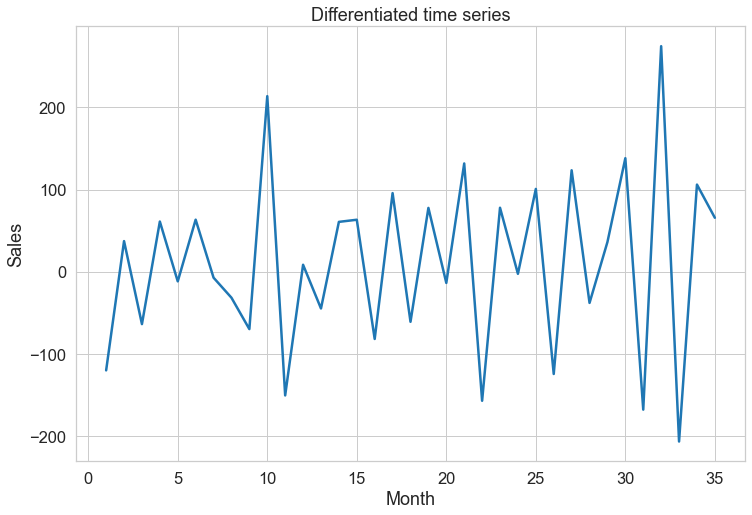

In [29]:
#differencing the time series to remove trend
df_diff = df_date.copy()

df_diff['Sales_diff'] = df_diff['Sales'] - df_diff['Sales'].shift(1)
df_diff.dropna(inplace=True)

ax = df_diff['Sales_diff'].plot(figsize=(12,8))
ax.set(xlabel='Month', ylabel = 'Sales')
ax.set_title('Differentiated time series')
plt.show()

In [30]:
# ADF Test
result = adfuller(df_diff['Sales_diff'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_diff['Sales_diff'], nlags='auto', regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
warnings.filterwarnings("ignore")

ADF Statistic: -7.249074055553854
p-value: 1.7998574141687034e-10
Critial Values:
   1%, -3.6461350877925254
Critial Values:
   5%, -2.954126991123355
Critial Values:
   10%, -2.6159676124885216

KPSS Statistic: 0.219281
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


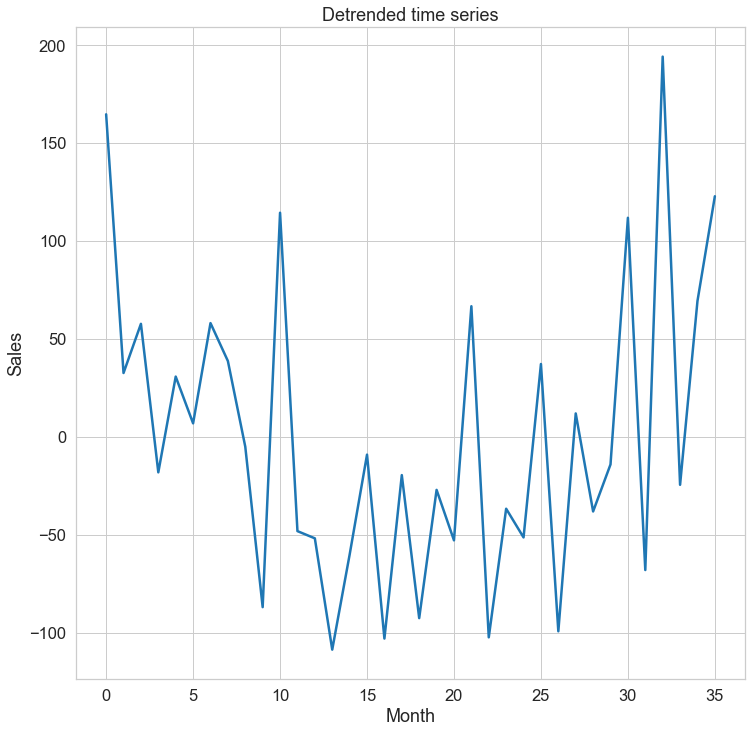

In [31]:
# use a linear model to detrend a time series
from sklearn.linear_model import LinearRegression

df_reg = df_date.copy()
X = [i for i in range(0, len(df_reg['Sales']))]
X = np.reshape(X, (len(X), 1))
y = df_reg['Sales'].values
model = LinearRegression()
model.fit(X, y)

# calculate trend
trend = model.predict(X)

# plot trend
plt.plot(y)
plt.plot(trend)
plt.title('Sales dataset plot with trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# detrend
detrended = [y[i]-trend[i] for i in range(0, len(df_reg['Sales']))]

# plot detrended
plt.plot(detrended)
plt.title('Detrended time series')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [32]:
# ADF Test
result = adfuller(detrended, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(detrended, nlags='auto', regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
warnings.filterwarnings("ignore")

ADF Statistic: -1.7514102733004764
p-value: 0.40483774055298394
Critial Values:
   1%, -3.6461350877925254
Critial Values:
   5%, -2.954126991123355
Critial Values:
   10%, -2.6159676124885216

KPSS Statistic: 0.240911
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


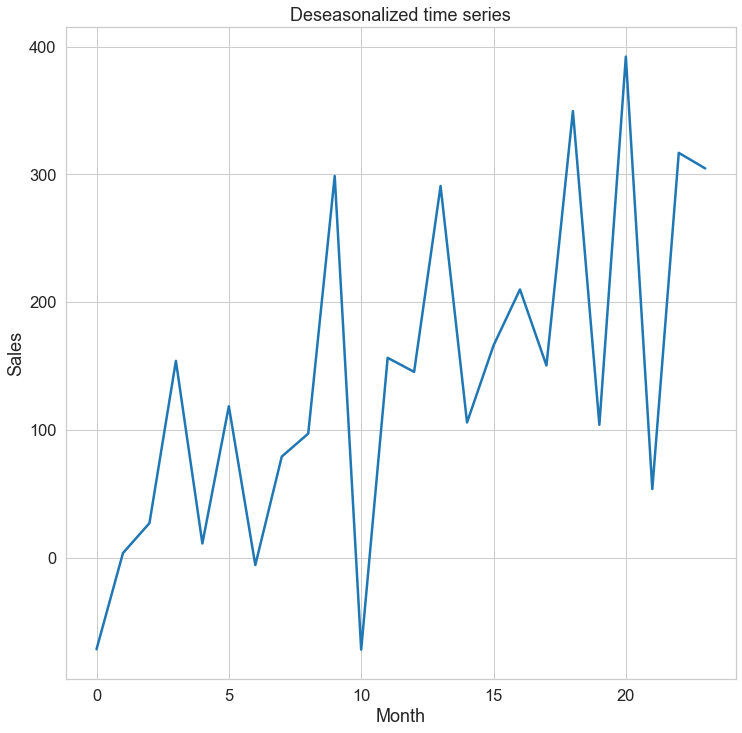

In [33]:
# deseasonalize a time series using differencing

X = df_reg['Sales'].values
deseason = list()
months_in_year = 12
for i in range(months_in_year, len(X)):
    value = X[i] - X[i - months_in_year]
    deseason.append(value)
plt.plot(deseason)
plt.title('Deseasonalized time series')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

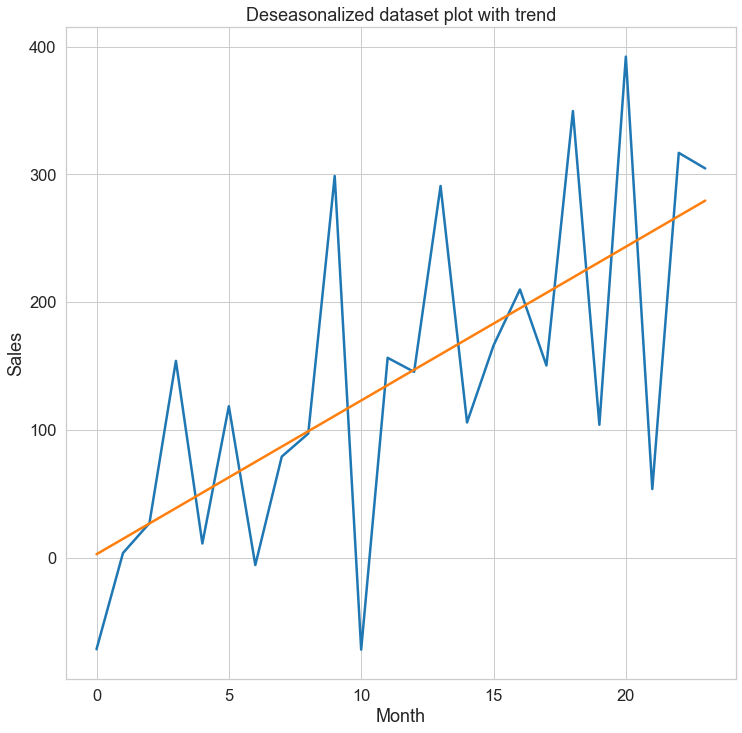

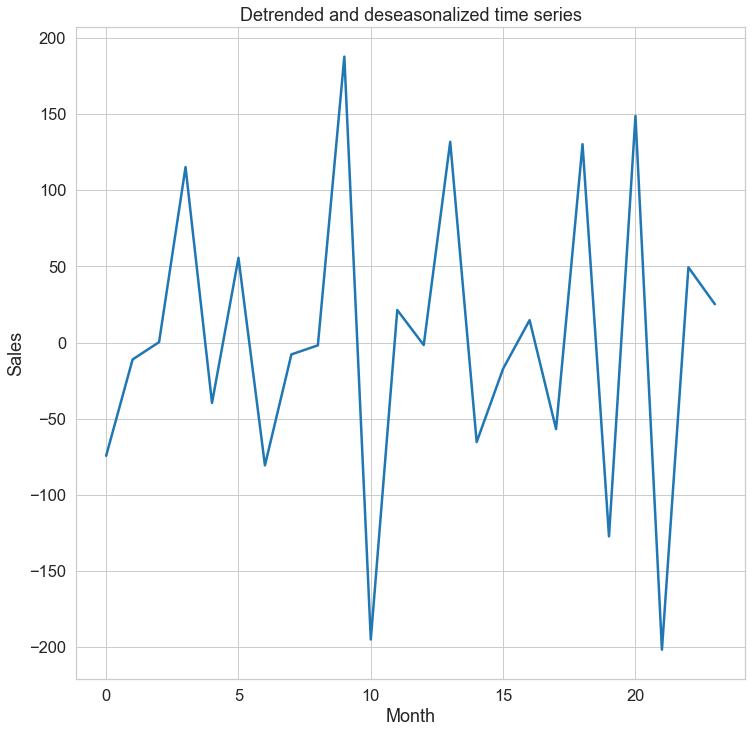

In [34]:
# use a linear model to detrend a time series
from sklearn.linear_model import LinearRegression

#df_detrend2 = df_date.copy()
X = [i for i in range(0, len(deseason))]
X = np.reshape(X, (len(X), 1))
y = deseason
model = LinearRegression()
model.fit(X, y)

# calculate trend
trend = model.predict(X)

# plot trend
plt.plot(y)
plt.plot(trend)
plt.title('Deseasonalized dataset plot with trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# detrend
detrended2 = [y[i]-trend[i] for i in range(0, len(deseason))]

# plot detrended
plt.plot(detrended2)
plt.title('Detrended and deseasonalized time series')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [35]:
# ADF Test
result = adfuller(detrended2, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(detrended2, nlags='auto', regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
warnings.filterwarnings("ignore")

ADF Statistic: -4.896898415937849
p-value: 3.5362410271387174e-05
Critial Values:
   1%, -3.8092091249999998
Critial Values:
   5%, -3.0216450000000004
Critial Values:
   10%, -2.6507125

KPSS Statistic: 0.018327
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


### Data modelling

After removing the seasonal and the trend components of the time series, we can now try to create a model to forecast the passenger counts for the next months. **Since we have transformed our data using the differencing method, after the forecasting, we need to we need to reverse the transformation (or back-transform) to obtain forecasts on the original scale**.

First we split our dataset in training and testing sets. We will use the first 4 years as the training set and the 5th year as the testing set.

We start with a simple average forecast. In this method, "the forecasts of all future values are equal to the average (or “mean”) of the historical data" (HYNDMAN; ATHANASOPOULOS, 2018). We verify that, as the mean absolute scaled error (MASE) is greater than 1, **the average forecast actually performs worse than the naive method** and, therefore, does not adds value.

We can try some ARIMA models too. First, we use an autoregressive (AR) model, where "we forecast the variable of interest using a linear combination of past values of the variable" (HYNDMAN; ATHANASOPOULOS, 2018). An AR model of order 11 is the best fit for the training data. We see that the AR(11) model performs worse than the average forecast, and once more the MASE is greater than 1, **so the AR model also performs worse than the naive method**.

The next model we test is a moving average (MA) model. It "uses past forecast errors in a regression-like model" (HYNDMAN; ATHANASOPOULOS, 2018). We create an MA model by using an ARIMA model and setting the order of the AR model the differencing to zero. We verify that a MA model of order 18 is the best fit for the training data. This MA(18) model performs worse than the previous models we tested, **and it stills performs worse than the naive method**, as the MASE is above 1.

Finally, we can try some models the combines AR and MA. We use an ARMA model first, and then test an ARIMA model. The difference between the two is that while the ARMA model only combines autoregression and moving average models, the ARIMA model also uses differencing (HYNDMAN; ATHANASOPOULOS, 2018). We create an ARMA model by using an ARIMA model and setting the order of the differencing to zero, in an analagous way we created the MA model. 

We use two criteria to evaluate the models, the AICc and the MASE. Both cirteria give suggests different orders for the ARMA model: (14,8) and (5,5). Testing both models with the test set, we verify that the ARMA(5,5) performs better for all other types of erros, MAE, RMSE, and MAPE. Therefore the best ARMA model for our data have order of the autoregressive part of 10 and order of the moving average part of 10. **This model have a MASE of 2.119, and it stills performs worse than the naive method**.

Regarding the ARIMA model, we can try to use the model directly with our data, without differencing, because the differencing is part of the model. We should remove the seasonal component form the data before using the ARIMA model. However, since the seasonal component is not as strenght as the trend component in our time series, we can trying using the ARIMA directly and check how it performs. We verify that the best ARIMA model for our data have order of the autoregressive part of 8, order of the moving average part of 2, and order of the differencing part 2. As expected, the differencing part have an order great than 0 due to the necessity of differencing the data. **This model have a MASE of 0.730, performing better than the other models and is the first one to perform better than the naive method**.

------------------------------------

In [168]:
df_train_test = df_date.copy()
df_train_test_diff = df_diff.copy()

train_set = df_train_test.iloc[:24,:]
test_set = df_train_test.iloc[24:,:]
print(train_set,'\n')
print(train_set.info(),'\n')
print(test_set,'\n')
print(test_set.info(),'\n')

train_set_diff = df_train_test_diff.iloc[:24]
test_set_diff = df_train_test_diff.iloc[24:36,:]
print(train_set_diff,'\n')
print(train_set_diff.info(),'\n')
print(test_set_diff,'\n')
print(test_set_diff.info(),'\n')

          Date  Sales
0   1995-01-01  266.0
1   1995-02-01  145.9
2   1995-03-01  183.1
3   1995-04-01  119.3
4   1995-05-01  180.3
5   1995-06-01  168.5
6   1995-07-01  231.8
7   1995-08-01  224.5
8   1995-09-01  192.8
9   1995-10-01  122.9
10  1995-11-01  336.5
11  1995-12-01  185.9
12  1996-01-01  194.3
13  1996-02-01  149.5
14  1996-03-01  210.1
15  1996-04-01  273.3
16  1996-05-01  191.4
17  1996-06-01  287.0
18  1996-07-01  226.0
19  1996-08-01  303.6
20  1996-09-01  289.9
21  1996-10-01  421.6
22  1996-11-01  264.5
23  1996-12-01  342.3 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    24 non-null     object 
 1   Sales   24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes
None 

          Date  Sales
24  1997-01-01  339.7
25  1997-02-01  440.4
26  1997-03-01  315.9
27  1997-04-01  439.3
28  1997-05-01  401.3
29

In [105]:
#forecasting with average method
y_hat_avg_diff = pd.DataFrame().reindex_like(test_set)
y_hat_avg_diff['Date'] = test_set['Date']
y_hat_avg_diff['Sales_diff'] = train_set_diff['Sales_diff'].mean()
y_hat_avg_diff.loc[25,'Sales'] = train_set_diff['Sales_diff'].mean() + train_set_diff.loc[24,'Sales']

for i in range(26,25+len(y_hat_avg_diff['Sales'])):
    k = i-1
    y_hat_avg_diff.loc[i,'Sales'] = train_set_diff['Sales_diff'].mean() + y_hat_avg_diff.loc[k,'Sales']

y_hat_avg_diff

Date       Sales  Sales_diff
25  1997-02-01  342.770833    3.070833
26  1997-03-01  345.841667    3.070833
27  1997-04-01  348.912500    3.070833
28  1997-05-01  351.983333    3.070833
29  1997-06-01  355.054167    3.070833
30  1997-07-01  358.125000    3.070833
31  1997-08-01  361.195833    3.070833
32  1997-09-01  364.266667    3.070833
33  1997-10-01  367.337500    3.070833
34  1997-11-01  370.408333    3.070833
35  1997-12-01  373.479167    3.070833

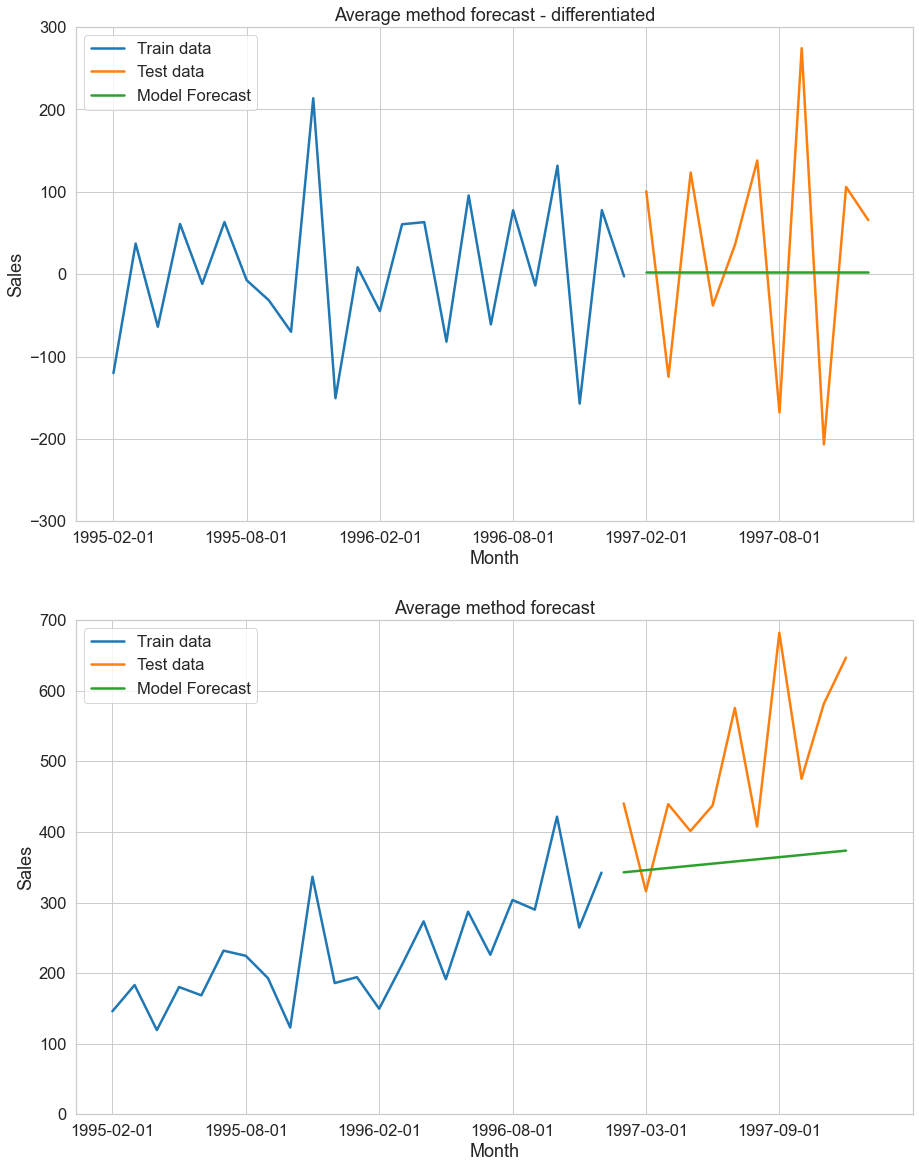

<Figure size 1152x720 with 0 Axes>

In [106]:
fig, axes = plt.subplots(2,1, figsize=(15, 20))

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

dx = sns.lineplot(ax=axes[0],data=train_set_diff,x='Date',y='Sales_diff')
ex = sns.lineplot(ax=axes[0],data=test_set_diff,x='Date',y='Sales_diff')
fx = sns.lineplot(ax=axes[0],data=y_hat_avg_diff,x='Date',y='Sales_diff')
axes[0].set(xlabel='Month', ylabel = 'Sales')
axes[0].set_title('Average method forecast - differentiated')
axes[0].set_ylim(-300,300)
axes[0].set_xticks(np.arange(0, 36 + 1, 6))
axes[0].legend(labels=["Train data","Test data","Model Forecast"])

ax = sns.lineplot(ax=axes[1],data=train_set,x='Date',y='Sales')
bx = sns.lineplot(ax=axes[1],data=test_set,x='Date',y='Sales')
cx = sns.lineplot(ax=axes[1],data=y_hat_avg_diff,x='Date',y='Sales')
axes[1].set(xlabel='Month', ylabel = 'Sales')
axes[1].set_title('Average method forecast')
axes[1].set_ylim(-0,700)
axes[1].set_xticks(np.arange(0, 36 + 1, 6))
axes[1].legend(labels=["Train data","Test data","Model Forecast"])

plt.show()

In [107]:
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_absolute_percentage_error

def MASE_func(training_series, testing_series, prediction_series):

    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

MAE = median_absolute_error(test_set['Sales'], y_hat_avg_diff['Sales'])
RMSE = mean_squared_error(test_set['Sales'], y_hat_avg_diff['Sales'],squared=False)
MAPE = mean_absolute_percentage_error(test_set['Sales'], y_hat_avg_diff['Sales'])
MASE = MASE_func(train_set['Sales'],test_set['Sales'],y_hat_avg_diff['Sales'])
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE=97.629
RMSE=167.620
MAPE=0.255
MASE=1.924


In [117]:
#find the best order for the AR Model

from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

sel = ar_select_order(train_set_diff['Sales_diff'], maxlag=11, trend='n', old_names=False)
sel.ar_lags
res_ar = sel.model.fit()
print(res_ar.summary())
warnings.filterwarnings("ignore")

                            AutoReg Model Results                             
Dep. Variable:             Sales_diff   No. Observations:                   24
Model:                    AutoReg(11)   Log Likelihood                 -47.126
Method:               Conditional MLE   S.D. of innovations              9.081
Date:                Wed, 26 May 2021   AIC                              6.258
Time:                        11:24:37   BIC                              6.780
Sample:                            11   HQIC                             6.151
                                   24                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Sales_diff.L1     -0.4077      0.058     -6.999      0.000      -0.522      -0.294
Sales_diff.L2      0.2425      0.074      3.280      0.001       0.098       0.387
Sales_diff.L3      0.1415      0.065

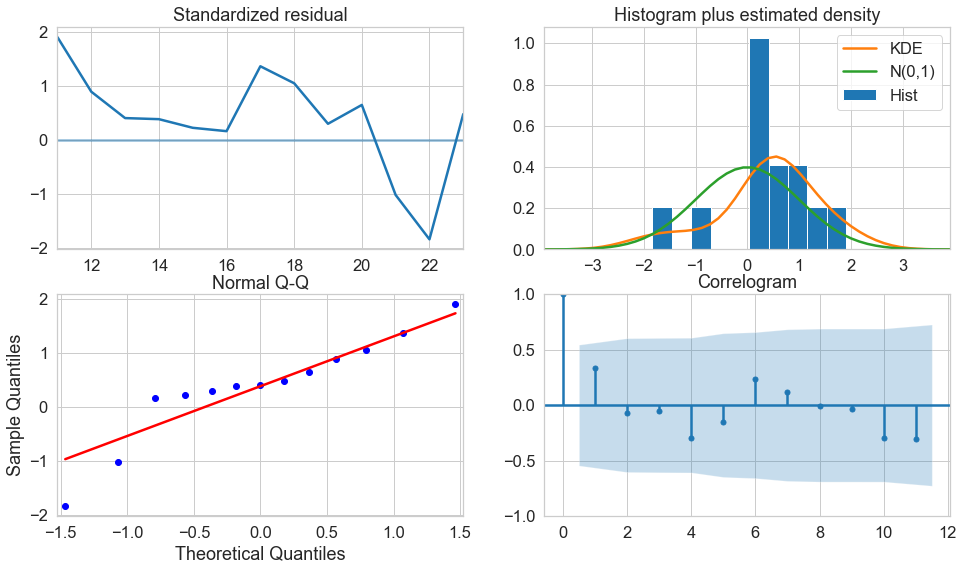

In [118]:
fig = plt.figure(figsize=(16,9))
fig = res_ar.plot_diagnostics(lags=11, fig=fig)

In [139]:
yhat_AR = res_ar.predict(start=len(train_set_diff['Sales_diff'])+1, end=(len(df_diff)), dynamic=False)

y_hat_AR_diff = pd.DataFrame().reindex_like(test_set)
y_hat_AR_diff['Sales_diff'] = yhat_AR
y_hat_AR_diff['Date'] = test_set['Date']
y_hat_AR_diff.loc[25,'Sales'] = yhat_AR[25] + train_set_diff.loc[24,'Sales']

for i in range(26,25+len(y_hat_AR_diff['Sales'])):
    k = i-1
    y_hat_AR_diff.loc[i,'Sales'] = yhat_AR[i] + y_hat_AR_diff.loc[k,'Sales']

y_hat_AR_diff

Date        Sales  Sales_diff
25  1997-02-01   312.690183  -27.009817
26  1997-03-01   285.257778  -27.432405
27  1997-04-01   425.466912  140.209135
28  1997-05-01   416.161754   -9.305159
29  1997-06-01   590.071507  173.909753
30  1997-07-01   543.496309  -46.575198
31  1997-08-01   717.696253  174.199944
32  1997-09-01   650.956958  -66.739295
33  1997-10-01   890.169343  239.212385
34  1997-11-01   951.264939   61.095596
35  1997-12-01  1152.189087  200.924148

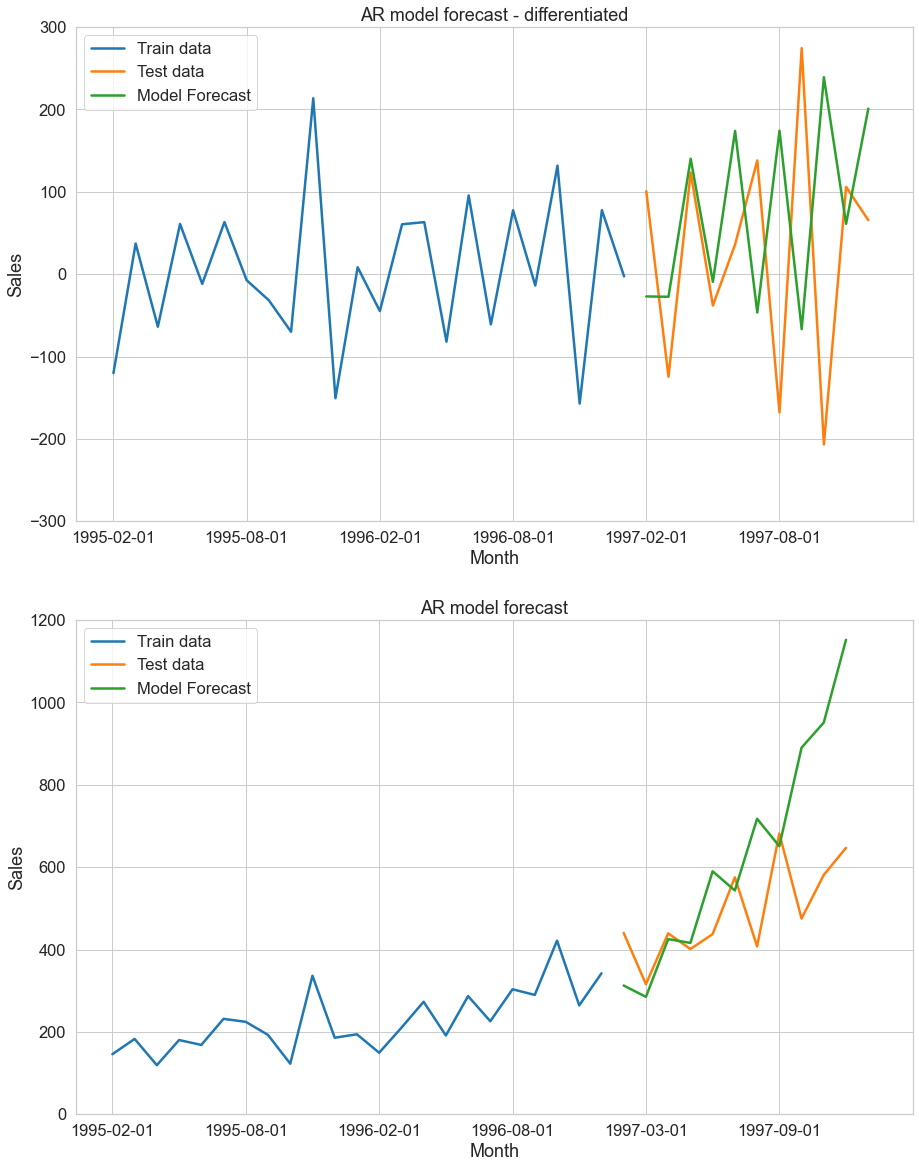

<Figure size 1152x720 with 0 Axes>

In [140]:
fig, axes = plt.subplots(2,1, figsize=(15, 20))

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

dx = sns.lineplot(ax=axes[0],data=train_set_diff,x='Date',y='Sales_diff')
ex = sns.lineplot(ax=axes[0],data=test_set_diff,x='Date',y='Sales_diff')
fx = sns.lineplot(ax=axes[0],data=y_hat_AR_diff,x='Date',y='Sales_diff')
axes[0].set(xlabel='Month', ylabel = 'Sales')
axes[0].set_title('AR model forecast - differentiated')
axes[0].set_ylim(-300,300)
axes[0].set_xticks(np.arange(0, 36 + 1, 6))
axes[0].legend(labels=["Train data","Test data","Model Forecast"])

ax = sns.lineplot(ax=axes[1],data=train_set,x='Date',y='Sales')
bx = sns.lineplot(ax=axes[1],data=test_set,x='Date',y='Sales')
cx = sns.lineplot(ax=axes[1],data=y_hat_AR_diff,x='Date',y='Sales')
axes[1].set(xlabel='Month', ylabel = 'Sales')
axes[1].set_title('AR model forecast')
axes[1].set_ylim(-0,1200)
axes[1].set_xticks(np.arange(0, 36 + 1, 6))
axes[1].legend(labels=["Train data","Test data","Model Forecast"])

plt.show()

In [126]:
MAE = median_absolute_error(test_set['Sales'], y_hat_AR_diff['Sales'])
RMSE = mean_squared_error(test_set['Sales'], y_hat_AR_diff['Sales'],squared=False)
MAPE = mean_absolute_percentage_error(test_set['Sales'], y_hat_AR_diff['Sales'])
MASE = MASE_func(train_set['Sales'],test_set['Sales'],y_hat_AR_diff['Sales'])
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE=127.710
RMSE=252.879
MAPE=0.360
MASE=2.530


In [132]:
#find the best order for the MA Model

from statsmodels.tsa.arima.model import ARIMA

MA = pd.DataFrame(columns=['order','MAE','RMSE','MAPE','MASE'])
for i in range(31):
    MA_model = ARIMA(train_set_diff['Sales_diff'], order=(0, 0, i))
    res_MA = MA_model.fit()
    yhat_MA = res_MA.predict(start=len(train_set_diff['Sales_diff'])+1, end=(len(df_diff)), dynamic=False)
    try:
        MAE = median_absolute_error(train_set_diff['Sales_diff'], yhat_MA)
    except:
        pass
    try:
        RMSE = mean_squared_error(train_set_diff['Sales_diff'], yhat_MA,squared=False)
    except:
        pass 
    try:
        MAPE = mean_absolute_percentage_error(train_set_diff['Sales_diff'], yhat_MA)
    except:
        pass     
    try:
        MASE = MASE_func(train_set_diff['Sales_diff'],test_set_diff['Sales_diff'],yhat_MA)
    except:
        pass            
    MA2 = pd.Series([i,MAE,RMSE,MAPE,MASE], index=MA.columns )
    #MA2 = pd.DataFrame([[i,MAE,RMSE,MAPE,MASE]])
    MA = MA.append(MA2,ignore_index=True)
    #print(MA)
#warnings.filterwarnings("ignore")
MA

order         MAE       RMSE      MAPE      MASE
0     0.0  127.709817  252.87885  0.359715  0.928307
1     1.0  127.709817  252.87885  0.359715  0.920745
2     2.0  127.709817  252.87885  0.359715  0.918765
3     3.0  127.709817  252.87885  0.359715  0.913749
4     4.0  127.709817  252.87885  0.359715  0.914559
5     5.0  127.709817  252.87885  0.359715  0.942328
6     6.0  127.709817  252.87885  0.359715       NaN
7     7.0  127.709817  252.87885  0.359715       NaN
8     8.0  127.709817  252.87885  0.359715  0.936670
9     9.0  127.709817  252.87885  0.359715  0.965619
10   10.0  127.709817  252.87885  0.359715  0.970839
11   11.0  127.709817  252.87885  0.359715  1.024447
12   12.0  127.709817  252.87885  0.359715  0.932485
13   13.0  127.709817  252.87885  0.359715  0.914046
14   14.0  127.709817  252.87885  0.359715  0.950733
15   15.0  127.709817  252.87885  0.359715  1.066891
16   16.0  127.709817  252.87885  0.359715  1.073431
17   17.0  127.709817  252.87885  0.359715  1.058252
18   18.0  127.709817  252.87885  0.359715  0.851160
19   19.0  127.709817  252.87885  0.359715  0.978890
20   20.0  127.709817  252.87885  0.359715  0.977396
21   21.0  127.709817  252.87885  0.359715  1.097373
22   22.0  127.709817  252.87885  0.359715  1.113579
23   23.0  127.709817  252.87885  0.359715  0.972902
24   24.0  127.709817  252.87885  0.359715  0.962092
25   25.0  127.709817  252.87885  0.359715  1.096546
26   26.0  127.709817  252.87885  0.359715  0.911563
27   27.0  127.709817  252.87885  0.359715  0.917169
28   28.0  127.709817  252.87885  0.359715  0.928455
29   29.0  127.709817  252.87885  0.359715  0.896373
30   30.0  127.709817  252.87885  0.359715  0.981625

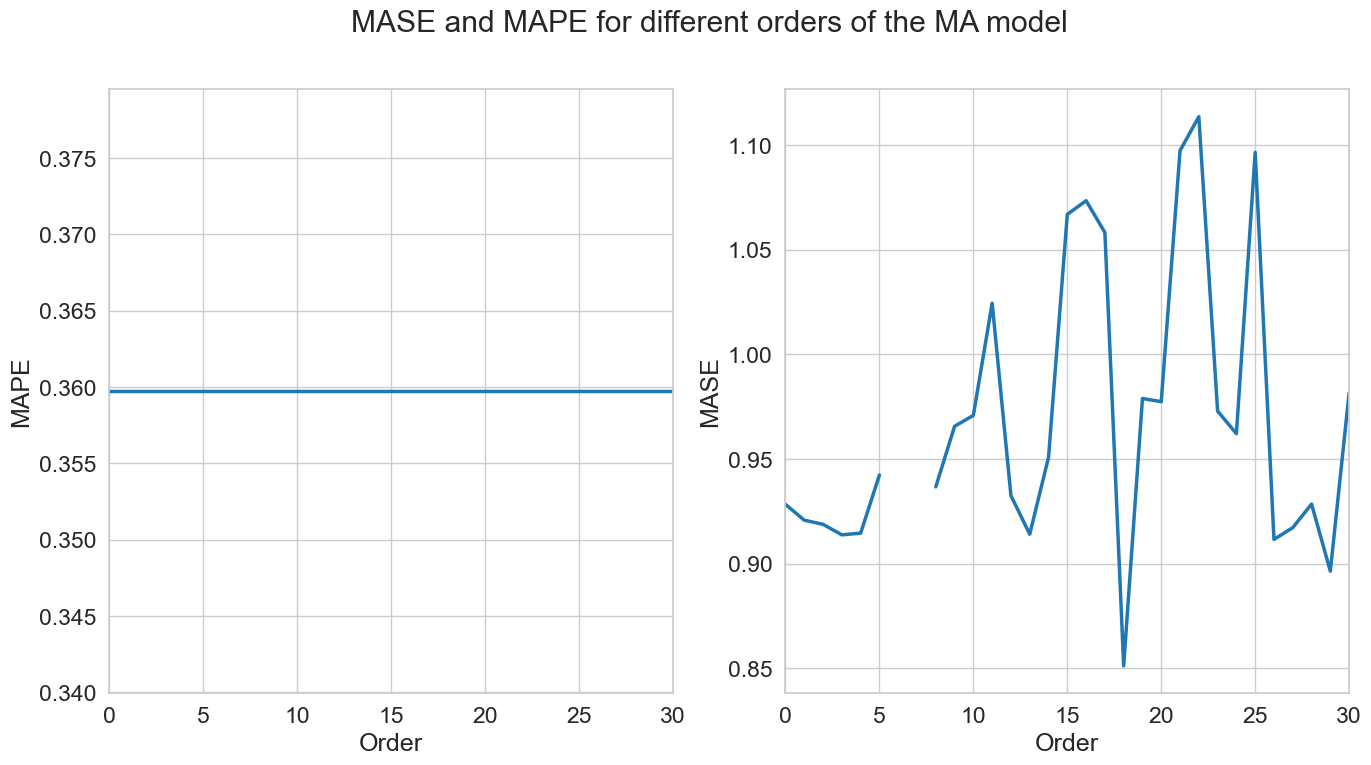

In [133]:
fig_MA, axes = plt.subplots(1,2,figsize=(16,8), dpi= 100)
fig_MA.suptitle('MASE and MAPE for different orders of the MA model')

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.lineplot(data=MA['MAPE'], ax=axes[0])
#ax.set_xticks(np.arange(0, 60 + 1, 1))
axes[0].set(xlabel='Order', ylabel = 'MAPE')
axes[0].set_xlim(0,30)

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.lineplot(data=MA['MASE'], ax=axes[1])
#ax.set_xticks(np.arange(0, 60 + 1, 1))
axes[1].set(xlabel='Order', ylabel = 'MASE')
axes[1].set_xlim(0,30)

plt.show()

In [134]:
print('Minimum ',MA[['MAE']].idxmin())
print('Minimum ',MA[['RMSE']].idxmin())
print('Minimum ',MA[['MAPE']].idxmin())
print('Minimum ',MA[['MASE']].idxmin())

Minimum  MAE    0
dtype: int64
Minimum  RMSE    0
dtype: int64
Minimum  MAPE    0
dtype: int64
Minimum  MASE    18
dtype: int64


In [135]:
from statsmodels.tsa.arima.model import ARIMAResults

MA_model = ARIMA(train_set_diff['Sales_diff'], order=(0, 0, 18))
res_MA = MA_model.fit()

print(res_MA.summary())

warnings.filterwarnings("ignore")

                               SARIMAX Results                                
Dep. Variable:             Sales_diff   No. Observations:                   24
Model:                ARIMA(0, 0, 18)   Log Likelihood                -126.784
Date:                Wed, 26 May 2021   AIC                            293.567
Time:                        11:35:31   BIC                            317.128
Sample:                             0   HQIC                           299.818
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5958     30.183      0.351      0.726     -48.563      69.754
ma.L1         -1.0087    254.358     -0.004      0.997    -499.541     497.524
ma.L2          0.5468    227.624      0.002      0.9

In [137]:
yhat_MA = res_MA.predict(start=len(train_set_diff['Sales_diff'])+1, end=(len(df_diff)), dynamic=False)

y_hat_MA_diff = pd.DataFrame().reindex_like(test_set)
y_hat_MA_diff['Sales_diff'] = yhat_MA
y_hat_MA_diff['Date'] = test_set['Date']
y_hat_MA_diff.loc[25,'Sales'] = yhat_MA[25] + train_set_diff.loc[24,'Sales']

for i in range(26,25+len(y_hat_MA_diff['Sales'])):
    k = i-1
    y_hat_MA_diff.loc[i,'Sales'] = yhat_MA[i] + y_hat_MA_diff.loc[k,'Sales']

y_hat_MA_diff

Date       Sales  Sales_diff
25  1997-02-01  336.125822   -3.574178
26  1997-03-01  288.511090  -47.614732
27  1997-04-01  377.687125   89.176035
28  1997-05-01  357.568144  -20.118981
29  1997-06-01  404.962151   47.394007
30  1997-07-01  394.436047  -10.526105
31  1997-08-01  411.574407   17.138361
32  1997-09-01  395.305194  -16.269214
33  1997-10-01  427.787925   32.482732
34  1997-11-01  448.291385   20.503459
35  1997-12-01  449.311334    1.019949

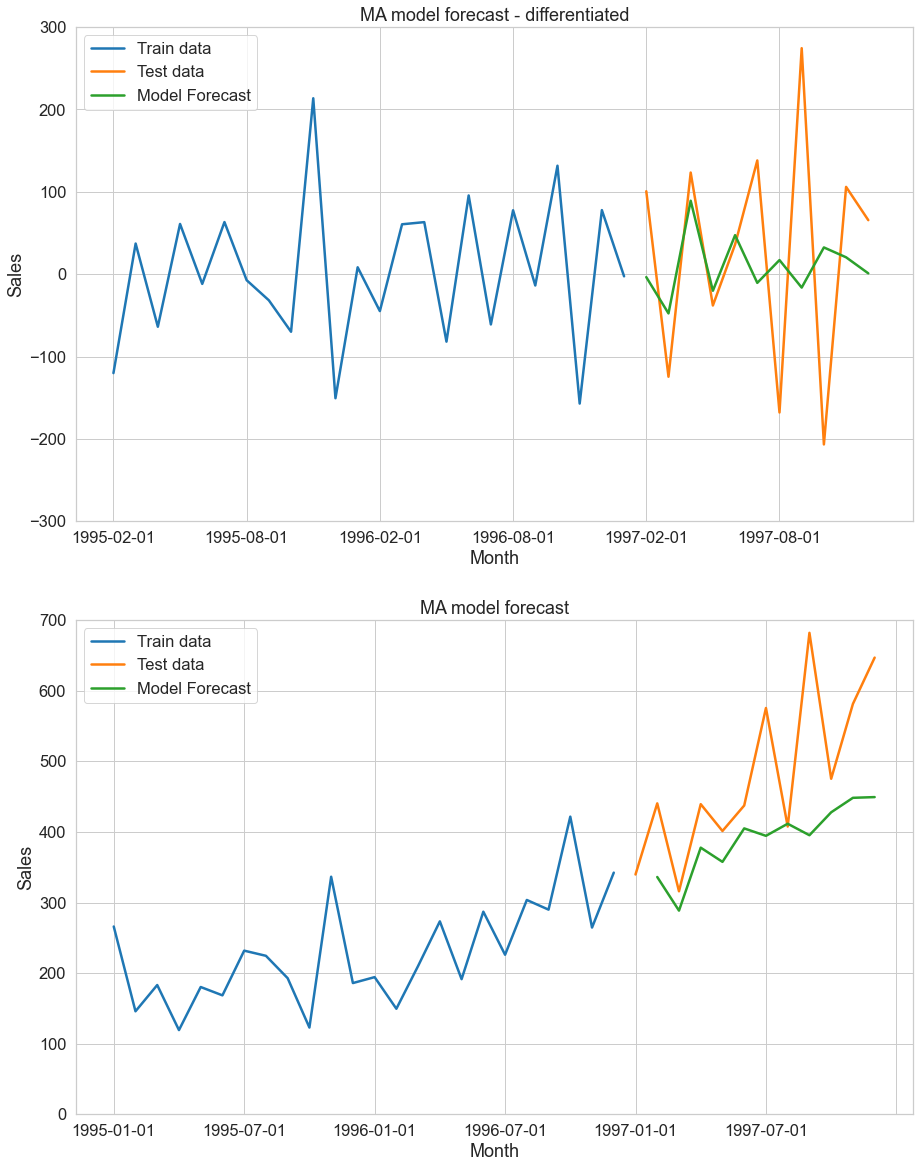

<Figure size 1152x720 with 0 Axes>

In [220]:
fig, axes = plt.subplots(2,1, figsize=(15, 20))

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

dx = sns.lineplot(ax=axes[0],data=train_set_diff,x='Date',y='Sales_diff')
ex = sns.lineplot(ax=axes[0],data=test_set_diff,x='Date',y='Sales_diff')
fx = sns.lineplot(ax=axes[0],data=y_hat_MA_diff,x='Date',y='Sales_diff')
axes[0].set(xlabel='Month', ylabel = 'Sales')
axes[0].set_title('MA model forecast - differentiated')
axes[0].set_ylim(-300,300)
axes[0].set_xticks(np.arange(0, 36 + 1, 6))
axes[0].legend(labels=["Train data","Test data","Model Forecast"])

ax = sns.lineplot(ax=axes[1],data=train_set,x='Date',y='Sales')
bx = sns.lineplot(ax=axes[1],data=test_set,x='Date',y='Sales')
cx = sns.lineplot(ax=axes[1],data=y_hat_MA_diff,x='Date',y='Sales')
axes[1].set(xlabel='Month', ylabel = 'Sales')
axes[1].set_title('MA model forecast')
axes[1].set_ylim(-0,700)
axes[1].set_xticks(np.arange(0, 36 + 1, 6))
axes[1].legend(labels=["Train data","Test data","Model Forecast"])

plt.show()

In [1]:
MAE = median_absolute_error(test_set['Sales'], y_hat_MA_diff['Sales'])
RMSE = mean_squared_error(test_set['Sales'], y_hat_MA_diff['Sales'],squared=False)
MAPE = mean_absolute_percentage_error(test_set['Sales'], y_hat_MA_diff['Sales'])
MASE = MASE_func(train_set['Sales'],test_set['Sales'],y_hat_MA_diff['Sales'])
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

NameError: name 'median_absolute_error' is not defined

In [142]:
# calculate AICc from AIC
def calculate_AICc(train, arma_order):
    model = ARIMA(train, order=arma_order)
    model_fit = model.fit()
    aic = model_fit.aic
    parameters = sum(arma_order)
    T = len(train)
    aicc = aic+(2*(parameters+2)*(parameters+3))/(T-(parameters+3))
    return aicc  

In [192]:
# evaluate an ARIMA model for a given order (p,d,q)
  
# evaluate combinations of p, d, and q values for an ARIMA model
def evaluate_ARIMA(train, test, p_values, d_values, q_values, matriz):
    best_aicc, best_mase, best_order_aicc, best_order_mase = float("inf"),float("inf"), None, None
    k_i = train.index.values[0] + len(train)
    k_f = k_i + len(test) - 1
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    #calculate aicc
                    aicc = calculate_AICc(train, order)
                    if aicc < best_aicc:
                        best_aicc, best_order_aicc = aicc, (p,d,q)


                    #calculate MASE
                    model_ = ARIMA(train, order=(p,d,q))
                    res_ = model_.fit()
                    yhat_ = res_.predict(start=k_i, end=k_f, dynamic=False)
                    mase = MASE_func(train,test,yhat_)
                    if mase < best_mase:
                        best_mase, best_order_mase = mase, (p,d,q)                
                
                    #store values
                    matriz2 = pd.Series([order,aicc,mase], index=matriz.columns)
                    matriz = matriz.append(matriz2,ignore_index=True)
                except:
                    continue
    print('Best ARIMA%s AICc=%.3f' % (best_order_aicc, best_aicc))
    print('Best ARIMA%s MASE=%.3f' % (best_order_mase, best_mase))
    return matriz

In [206]:
#ARMA model
p_values = range(0,15)
d_values = range(0,1)
q_values = range(0,15)
ARMA = pd.DataFrame(columns=['order','AICc','MASE'])
ARMA1 = evaluate_ARIMA(train_set_diff['Sales_diff'],test_set_diff['Sales_diff'] , p_values, d_values, q_values,ARMA)
warnings.filterwarnings("ignore")
ARMA1

Best ARIMA(14, 0, 8) AICc=-895.763
Best ARIMA(5, 0, 5) MASE=0.672


order        AICc      MASE
0      (0, 0, 0)  287.530469  0.928307
1      (0, 0, 1)  273.542583  0.920745
2      (0, 0, 2)  275.680415  0.918765
3      (0, 0, 3)  278.376378  0.913749
4      (0, 0, 4)  281.812339  0.914559
..           ...         ...       ...
182   (14, 0, 9) -340.621065  1.039821
183  (14, 0, 10) -156.867090  1.002366
184  (14, 0, 11)  -65.399679  1.043107
185  (14, 0, 13)   24.241348  1.024914
186  (14, 0, 14)   50.855093  1.027394

[187 rows x 3 columns]

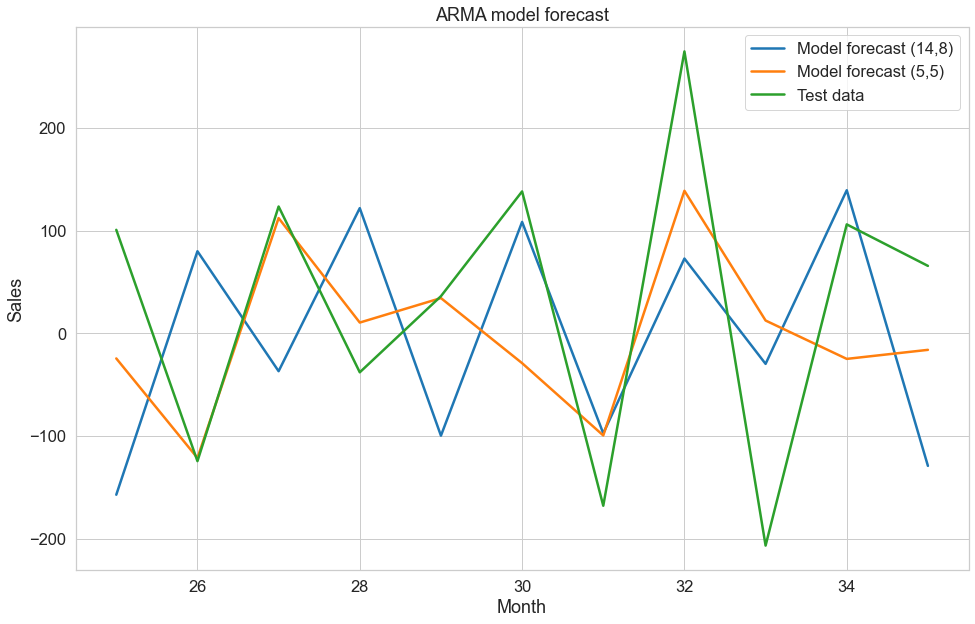

In [207]:
k_i = train_set_diff.index.values[0] + len(train_set_diff)
k_f = k_i + len(test_set_diff) - 1

ARMA_model = ARIMA(train_set_diff['Sales_diff'], order=(14, 0, 8))
res_ARMA = ARMA_model.fit()
yhat_ARMA = res_ARMA.predict(start=k_i, end=k_f, dynamic=False)

ARMA_model2 = ARIMA(train_set_diff['Sales_diff'], order=(5, 0, 5))
res_ARMA2 = ARMA_model2.fit()
yhat_ARMA2 = res_ARMA2.predict(start=k_i, end=k_f, dynamic=False)

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=yhat_ARMA)
ax.set(xlabel='Month', ylabel = 'Sales')
ax.set_title('ARMA model forecast')
#ax.set_xlim(49,60)
bx = sns.lineplot(data=yhat_ARMA2)
cx = sns.lineplot(data=test_set_diff['Sales_diff'])
plt.legend(labels=["Model forecast (14,8)", "Model forecast (5,5)","Test data"])
plt.show()
warnings.filterwarnings("ignore")

In [208]:
MAE = median_absolute_error(test_set_diff['Sales_diff'], yhat_ARMA)
RMSE = mean_squared_error(test_set_diff['Sales_diff'], yhat_ARMA,squared=False)
MAPE = mean_absolute_percentage_error(test_set_diff['Sales_diff'], yhat_ARMA)
MASE = MASE_func(train_set_diff['Sales_diff'],test_set_diff['Sales_diff'],yhat_ARMA)
print("ARMA(14,8):")
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE = median_absolute_error(test_set_diff['Sales_diff'], yhat_ARMA2)
RMSE = mean_squared_error(test_set_diff['Sales_diff'], yhat_ARMA2,squared=False)
MAPE = mean_absolute_percentage_error(test_set_diff['Sales_diff'], yhat_ARMA2)
MASE = MASE_func(train_set_diff['Sales_diff'],test_set_diff['Sales_diff'],yhat_ARMA2)
print("\nARMA(5,5):")
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

ARMA(14,8):
MAE=160.319
RMSE=163.697
MAPE=1.725
MASE=1.099

ARMA(5,5):
MAE=81.740
RMSE=113.234
MAPE=0.758
MASE=0.672


In [216]:
k_i = train_set_diff.index.values[0] + len(train_set_diff)
k_f = k_i + len(test_set_diff) - 1

yhat_ARMA = res_ARMA2.predict(start=k_i, end=k_f, dynamic=False)
y_hat_ARMA_diff = pd.DataFrame().reindex_like(test_set_diff)
y_hat_ARMA_diff['Sales_diff'] = yhat_ARMA
y_hat_ARMA_diff['Date'] = test_set['Date']
y_hat_ARMA_diff.loc[25,'Sales'] = yhat_ARMA[25] + train_set_diff.loc[24,'Sales']

for i in range(26,25+len(y_hat_ARMA_diff['Sales'])):
    k = i-1
    y_hat_ARMA_diff.loc[i,'Sales'] = yhat_ARMA[i] + y_hat_ARMA_diff.loc[k,'Sales']

y_hat_ARMA_diff

Date       Sales  Sales_diff
25  1997-02-01  315.199946  -24.500054
26  1997-03-01  193.798392 -121.401554
27  1997-04-01  305.938459  112.140067
28  1997-05-01  316.362888   10.424429
29  1997-06-01  350.618913   34.256025
30  1997-07-01  321.533659  -29.085254
31  1997-08-01  222.050300  -99.483359
32  1997-09-01  360.750842  138.700543
33  1997-10-01  373.156227   12.405385
34  1997-11-01  348.212855  -24.943372
35  1997-12-01  332.073134  -16.139722

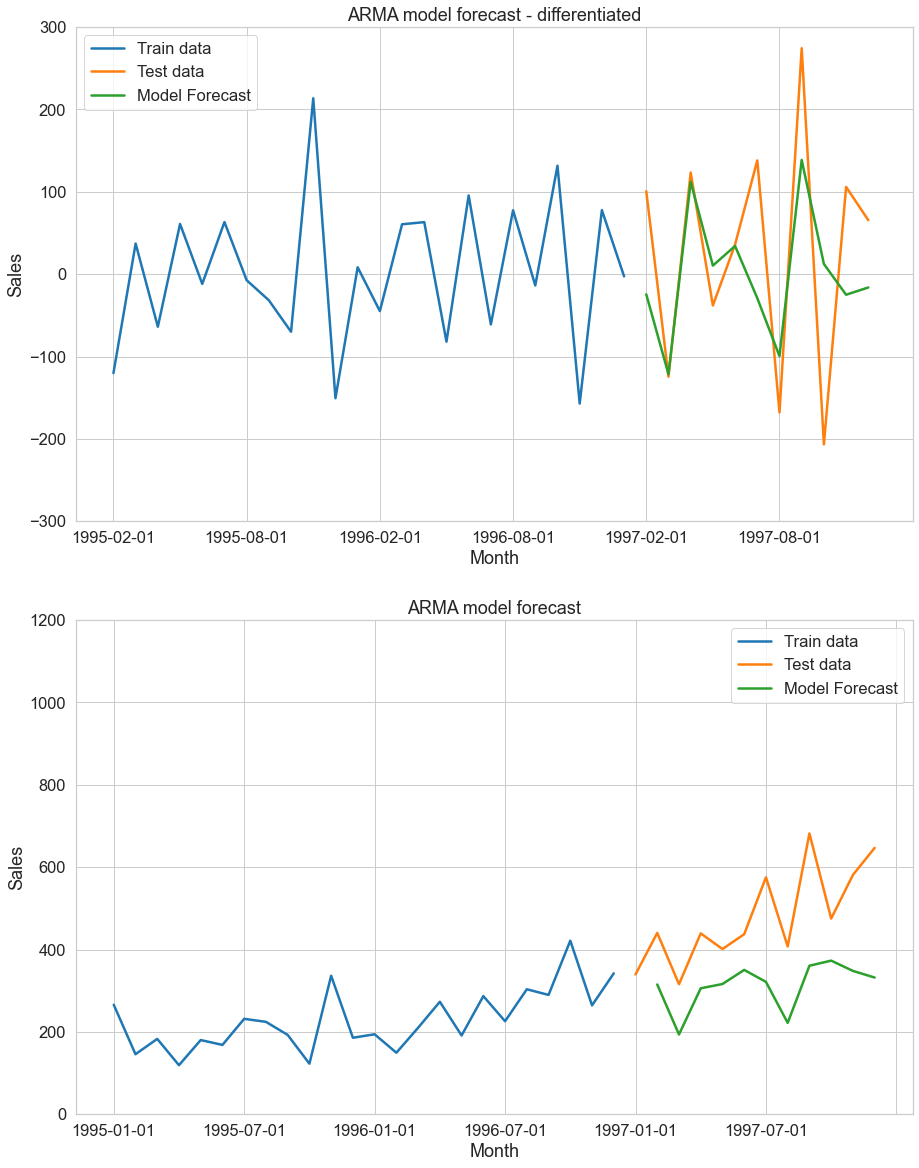

<Figure size 1152x720 with 0 Axes>

In [217]:
fig, axes = plt.subplots(2,1, figsize=(15, 20))

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

dx = sns.lineplot(ax=axes[0],data=train_set_diff,x='Date',y='Sales_diff')
ex = sns.lineplot(ax=axes[0],data=test_set_diff,x='Date',y='Sales_diff')
fx = sns.lineplot(ax=axes[0],data=y_hat_ARMA_diff,x='Date',y='Sales_diff')
axes[0].set(xlabel='Month', ylabel = 'Sales')
axes[0].set_title('ARMA model forecast - differentiated')
axes[0].set_ylim(-300,300)
axes[0].set_xticks(np.arange(0, 36 + 1, 6))
axes[0].legend(labels=["Train data","Test data","Model Forecast"])

ax = sns.lineplot(ax=axes[1],data=train_set,x='Date',y='Sales')
bx = sns.lineplot(ax=axes[1],data=test_set,x='Date',y='Sales')
cx = sns.lineplot(ax=axes[1],data=y_hat_ARMA_diff,x='Date',y='Sales')
axes[1].set(xlabel='Month', ylabel = 'Sales')
axes[1].set_title('ARMA model forecast')
axes[1].set_ylim(-0,1200)
axes[1].set_xticks(np.arange(0, 36 + 1, 6))
axes[1].legend(labels=["Train data","Test data","Model Forecast"])

plt.show()

In [218]:
MAE = median_absolute_error(test_set_diff['Sales_diff'], y_hat_ARMA_diff['Sales'])
RMSE = mean_squared_error(test_set_diff['Sales_diff'], y_hat_ARMA_diff['Sales'],squared=False)
MAPE = mean_absolute_percentage_error(test_set_diff['Sales_diff'], y_hat_ARMA_diff['Sales'])
MASE = MASE_func(train_set_diff['Sales_diff'],test_set_diff['Sales_diff'],y_hat_ARMA_diff['Sales'])
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE=266.473
RMSE=311.041
MAPE=3.393
MASE=2.119


In [193]:
# evaluate an ARIMA model for a given order (p,d,q)

#ARiMA model
p_values = [0,1,2,4,8,10]
d_values = range(0,3)
q_values = [0,1,2,4,8,10]
ARIMA1 = pd.DataFrame(columns=['order','AICc','MASE'])
ARIMA2 = evaluate_ARIMA(train_set['Sales'],test_set['Sales'] , p_values, d_values, q_values,ARIMA1)
warnings.filterwarnings("ignore")
ARIMA2.head()

Best ARIMA(10, 2, 10) AICc=-899.343
Best ARIMA(8, 2, 10) MASE=0.730


order        AICc      MASE
0  (0, 0, 0)  278.929871  3.360495
1  (0, 0, 1)  280.849635  3.339489
2  (0, 0, 2)  279.462197  3.312685
3  (0, 0, 4)  280.534324  3.101508
4  (0, 0, 8)  296.975102  2.835721

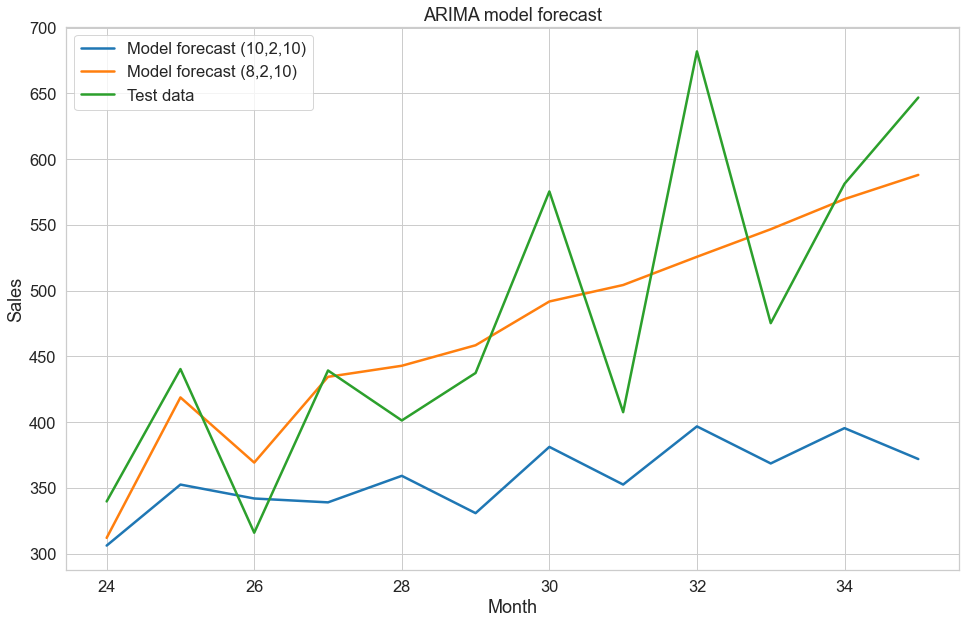

In [197]:
k_i = train_set.index.values[0] + len(train_set)
k_f = k_i + len(test_set) - 1

ARIMA_model = ARIMA(train_set['Sales'], order=(10, 2, 10))
res_ARIMA = ARIMA_model.fit()
yhat_ARIMA = res_ARIMA.predict(start=k_i, end=k_f, dynamic=False)

ARIMA_model2 = ARIMA(train_set['Sales'], order=(8, 2, 10))
res_ARIMA2 = ARIMA_model2.fit()
yhat_ARIMA2 = res_ARIMA2.predict(start=k_i, end=k_f, dynamic=False)

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=yhat_ARIMA)
ax.set(xlabel='Month', ylabel = 'Sales')
ax.set_title('ARIMA model forecast')
#ax.set_xlim(49,60)
bx = sns.lineplot(data=yhat_ARIMA2)
cx = sns.lineplot(data=test_set['Sales'])
plt.legend(labels=["Model forecast (10,2,10)", "Model forecast (8,2,10)","Test data"])
plt.show()
warnings.filterwarnings("ignore")

In [198]:
MAE = median_absolute_error(test_set['Sales'], yhat_ARIMA)
RMSE = mean_squared_error(test_set['Sales'], yhat_ARIMA,squared=False)
MAPE = mean_absolute_percentage_error(test_set['Sales'], yhat_ARIMA)
MASE = MASE_func(train_set['Sales'],test_set['Sales'],yhat_ARIMA)
print("ARIMA(10,2,10):")
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE = median_absolute_error(test_set['Sales'], yhat_ARIMA2)
RMSE = mean_squared_error(test_set['Sales'], yhat_ARIMA2,squared=False)
MAPE = mean_absolute_percentage_error(test_set['Sales'], yhat_ARIMA2)
MASE = MASE_func(train_set['Sales'],test_set['Sales'],yhat_ARIMA2)
print("\nARIMA(8,2,10):")
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

ARIMA(10,2,10):
MAE=103.451
RMSE=151.761
MAPE=0.235
MASE=1.686

ARIMA(8,2,10):
MAE=47.475
RMSE=68.157
MAPE=0.111
MASE=0.730


----------------------

## 3. Conclusion

In this notebook, we were able to analyze and forecast a time series. After preparing the data, we did an intial exploratory analysis to verify if there were any seasonal or ciclic pattern in the time series. We needed to differencing our data to remove the trend component and the seasonal component. Then, we used the ADH and KPSS tests to verifiy if the resulting data series was really stationary. Next, we started constructing our forecast model. Fisrt, we split the data in training and testing data sets and used a simple average forecast. This method did not performed well, so we tested ARIMA models. After, we tested several ARIMA models:

1. Autoregressive model (AR)
2. Moving average model (MA)
3. Autoregressive moving average model (ARMA)
4. Autoregressive integrated moving average model (ARIMA)

We verified that the best model for forcastings based on our time series is an ARIMA(8,2,10). The mean absolute scaled error (MASE) of 0.730 when we applied our model to the testing set showed that our model perfomrs better than the naive method. Therefore, we are confident that our model will make the best possible predictions based on the data available.

In [223]:
!pip install -r requirements.txt

!pip3 freeze > requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
